![](nebrija_logo.png)
### La Ciencia de Datos: Técnica de Análisis, Mineria y Visualización 
# Caso Práctico Final

# El Problema

## Datos
Cada día es más frecuente la introducción de la ciencia de datos en el ámbito del derecho y la justicia.

Un ejemplo bien conocido de ello es el sistema COMPAS (Correctional offender management profiling for alternative sanctions) que se usa en varios estados de los Estados Unidos para hacer una evaluación del riesgo de reincidencia de las personas detenidas.

Una breve descripción del sistema puede verse en la página https://en.wikipedia.org/wiki/COMPAS_(software).

Aunque el conjunto de datos contiene información adicional, para resolver las cuestiones planteadas en este caso son necesarios (aparte de algunos campos cuyo nombre es autoexplicativo) los siguientes campos:

1. `compas_screening_date`: se refiere a la fecha en la que se realizó la evaluación
2. `decile_score`: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).
3. `v_decile_score`: es un número de 1 a 10, potencialmente distinto del anterior, que indica el riesgo de reincidencia en delitos violentos. Al hacer la evaluación de un caso en COMPAS, se generan las dos puntuaciones (entre otras cosas).
4. `is_recid`: indicación de si la persona es reincidente (en el tiempo en que se recogen datos: no hay información de si la persona es reincidente más allá de ciertas fechas, y es importante tener esto en cuenta para asegurarse de hacer comparaciones homogéneas).
5. `r_offense_date`: fecha en la que se cometió el delito por el que se considera reincidente a la persona.
6. `is_violent_recid`: indicación de si la persona es reincidente en un delito con violencia (las mismas consideraciones sobre fechas que para `is_recid` aplican aquí).
7. `vr_offense_date`: fecha en la que se cometió el delito violento que da lugar a la consideración de reincidente.

## Trabajo
Se pide del alumno:

1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.
2. ¿Son los campos `is_recid` e `is_violent_recid` en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.
3. El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante. Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).
4. El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no. Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.      
5. ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?


# Introducción
El sistema COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) es un sistema que ha ganado cierto escrutinio por parte de grupos cívicos en Estados Unidos por tendencias a predecir resultados notablemente más nefastos para ciertos grupos minoritarios como afroamericanos y mujeres (Angwin, J. y Larson, J.,2016). El sistema es la a vez un programa cerrado con propiedad intelectual que no es software open source, lo que limita un poco el análisis del modelo que debe ser considerado una caja negra. La organización pública ProPublica de Estados Unidos llevó a cabo un estudio independiente donde intentó validar estadisticamente la precisión de los clasificadores, y en el cual encontró que "el sistema solo clasificaba correctamente casos de reincidencia un 61% del tiempo, y solamente era correcto para casos de reincidencia violenta un 20% del tiempo." (Larson, J., et al, 2016). 

Para poder hacer un análisis correcto del juego de datos, debemos profundizar un poco en la estructura del mismo, tarea que se facilita ya que existe un sitio GitHub con el juego de datos y el código (en lenguaje R) para el análisis que obtuvieron los autores (Larson, J., Roswell, M., y Atlidakis, V., 2015). 

Cada vez que una persona es arrestada en aquellos estados de Estados Unidos donde se utiliza el sistema COMPAS, se le hace un cuestionario de 137 preguntas que define un puntaje del 1 al 10. Dicho puntaje es en realidad un decil que trata de acomodarse como puntaje del 1 al 10 (Northpointe, 2011). Dicho puntaje tiene tres umbrales: 1 al 4 que define el riesgo de reincidencia como bajo, 5 al 7 que define el riesgo como mediano, y finalmente 8 al 10, que define el riesgo de reincidencia como alto. La escala aplica tanto a reincidencia como reincidencia violenta, aunque en realidad existen 4 escalas utilizadas en un total de 21 tipos diferentes de predicción. 

El hecho a profundizar es la relación entre el puntaje que otorgó COMPAS a cada persona respecto de si era prospecto de reincidencia y/o reincidencia violenta (dos puntajes separados) y la realidad de si la persona tuvo en algún momento un arresto por una ofensa mayor dentro de los dos años del análisis del estudio. Aquí es importante recordar que:

* El sistema COMPAS determina como un puntaje del uno al diez el potencial de la persona para reincidir o reincidir de una forma violenta, y un umbral de riesgo categórico (bajo, mediano y alto) como explica el manual de uso. 
* Sin embargo es el juez quien decide si aplica un arresto preventivo y/o fija una valor de fianza mayor. COMPAS no clasifica de por si, sino que es una herramienta de apoyo de toma de decisión del juez, quien puede utilizarlo plenamente, parcialmente, o descartar el análisis si lo desea. 
* La empresa propietaria de COMPAS mantiene su algoritmo secreto, ya que es propiedad intelectual. El análisis de ProPublica es posible una vez que se pueden comparar los puntajes y predicciones de COMPAS versus el hecho que la persona haya reincidido o no. Una persona pudo haber obtenido un puntaje bajo, no reincidir y haber recibido o no un trato injusto, de la misma forma que una persona con puntaje alto pudo haber recibido trato injusto o su informe se ignoró y el juez falló de otra forma. No hay manera en el momento de aislar el efecto humano. 

El escrutinio de COMPAS es múltiple. Se trata de si los sistemas de predicción tienen sesgo, si el entrenamiento de datos tiene sesgo, y si la interpretación y aplicación del sistema tiene sesgo. El sistema COMPAS de por si no condena, solo el juez tiene esa autoridad. Adicionalmente se introduce el elemento de raza y género. ProPublica ya ha determinado sesgo en torno a raza y genero en su estudio (Larson, J. et al, 2016) y lo mismo ha sido sustentado en cierta forma por otros estudio profundos, como los de Matias Barenstein. Para nuestro caso práctico, nos centraremos mucho más en las técnicas de minería de datos, visualización y análisis de la data con métodos descriptivos, y no los análisis estadísticos profundos que buscan determinar sesgo de los datos (como por ejemplo los modelos de regresión logística y Supervivencia Kaplan Meier que aplicaron otros autores. 


# Carga, Limpieza y Calidad de los Datos
Todo análisis comienza por la carga e inspección de los datos. En nuestro caso vamos a hacer una revisión general, y luego otra con especial enfasis en las variables especiales del problema. 

In [1]:
# Cargar librerias necesarias en el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar juego de datos en un dataframe y revisar estructura
compas = pd.read_csv("compas-scores.csv")
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11757 non-null  int64  
 1   name                     11757 non-null  object 
 2   first                    11757 non-null  object 
 3   last                     11757 non-null  object 
 4   compas_screening_date    11757 non-null  object 
 5   sex                      11757 non-null  object 
 6   dob                      11757 non-null  object 
 7   age                      11757 non-null  int64  
 8   age_cat                  11757 non-null  object 
 9   race                     11757 non-null  object 
 10  juv_fel_count            11757 non-null  int64  
 11  decile_score             11757 non-null  int64  
 12  juv_misd_count           11757 non-null  int64  
 13  juv_other_count          11757 non-null  int64  
 14  priors_count          

Inmediatamente salta a la vista que las variables que representan fechas están en formato `object` que en Python representa una cadena tipo caracteres. Al momento de comparar fechas podemos tener problema, por lo que es importante representarlas en el formato correcto. 

In [3]:
tags = ['compas_screening_date', 'c_jail_in', 'c_jail_out', 'r_jail_in', 'r_jail_out']
for variable in tags:
    compas[variable] = pd.to_datetime(compas[variable])
compas[tags].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   compas_screening_date  11757 non-null  datetime64[ns]
 1   c_jail_in              10577 non-null  datetime64[ns]
 2   c_jail_out             10577 non-null  datetime64[ns]
 3   r_jail_in              2460 non-null   datetime64[ns]
 4   r_jail_out             2460 non-null   datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 459.4 KB


Revisemos rápidamente los rangos de valores de las columnas de puntaje y clasificación que usaremos en el caso práctico. 

In [4]:
tags = ['decile_score', 'v_decile_score', 'is_recid', 'is_violent_recid']
compas[tags].describe()

,decile_score,v_decile_score,is_recid,is_violent_recid
count,11757.000000,11757.000000,11757.000000,11757.000000
mean,4.371268,3.571489,0.253806,0.075019
std,2.877598,2.500479,0.558324,0.263433
min,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,4.000000,3.000000,0.000000,0.000000
75%,7.000000,5.000000,1.000000,0.000000
max,10.000000,10.000000,1.000000,1.000000


Aquí hay dos casos aparte que revisar. Primero, porque los valores de las columnas `decile_score` y `v_decile_score`, que supuestamente van del 1 al 10, tienen valores -1, y luego el significado de -1 en `is_recid` que debiera ser una variable binaria. 

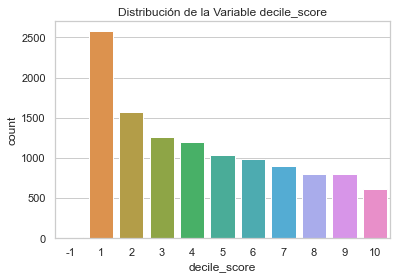

In [5]:
# Revisar distribución de valores decile_score
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'decile_score', data = compas)
ax.set_title("Distribución de la Variable decile_score")
plt.show()

In [6]:
# ¿Cuántos valores de -1 en decile_score?
compas[compas['decile_score'] == -1]['decile_score'].count()

15

La cantidad es suficientemente menor como para no ser significativa en el análisis. Avancemos ahora con la columna `v_decile_score`.

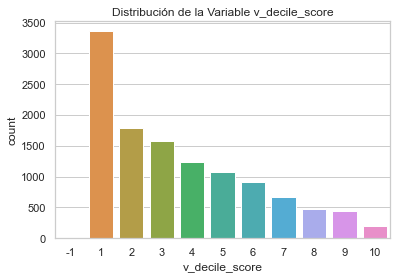

In [7]:
# Revisar distribución de valores decile_score
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'v_decile_score', data = compas)
ax.set_title("Distribución de la Variable v_decile_score")
plt.show()

In [8]:
# ¿Cuántos valores de -1 en v_decile_score?
compas[compas['v_decile_score'] == -1]['v_decile_score'].count()

5

La cantidad es inclusive menor, y no debiera afectar el resultado de los análisis que haremos posteriormente.

Sobre el significado del valor -1 en la columna `is_recid`, es algo adrede realizado por el equipo de ProPublica en el análisis de los datos. Matias Barenstein ya analizó este caso y detecto que: "... Adicionalmente, ProPublica también eliminó 719 personas de las cuales no tenía datos fiables. Propublica no pudo encontrar información de casos/arrestos de los mismos. ProPublica etiquetó estos casos como "is_recid = -1" en el juego de datos completo 3.0..." (Barenstein, M., 2019). ¿Cómo manejar esta variable que el mismo ProPublica etiquetó como poco fiables? Asumimos que el cambio de estatus es adrede y que no debieran conformar parte de cualquier análisis que hagamos ya que los datos carecen de veracidad. Asumimos esta postura ya que según el artículo científico de Barenstein estos registros se cambiaron de 1 (reincidente) a -1 (no hay prueba de reincidencia), contradiciendo la validez del primer estado. Solo para confirmar, revisemos si cuando la columna `is_recid` esta fijada al valor -1, hay una fecha de caso reincidente (o sea la columna `r_offense_date` debiera ser nula, ya que nunca se registró un arresto que califique como reincidencia).

In [9]:
# Casos que aparecen como is_recid == -1 y fecha nula
compas[(compas['is_recid'] == -1) & (compas['r_offense_date'].isnull())]['is_recid'].count()

719

El resultado es 719, exactamente como explica Barenstein en su disertación.

# Validez de Flags de Reincidencia y Reincidencia Violenta

En el punto anterior anticipamos los problemas de la columna `is_recid` que debe medir el estatus de reincidencia o no como una variable binaria pero contiene tres valores (-1, 0 y 1). ProPublica precalifico con -1 todos los casos que el sistema no aclara de forma perfecta que hubo reincidencia. Para propósitos de nuestro análisis debemos tomar cualquier valor que no prueba fehacientemente la reincidencia como no reincidente (de la misma forma que la persona es inocente a menos que se compruebe culpable). En tal caso construiremos un _feature_ con solo dos valores.

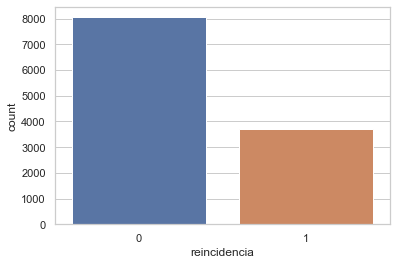

In [10]:
# Construir feature binario nuevo de is_recid sin ambiguedad
# Lección de LIST COMPREHENSION original de https://data-flair.training/blogs/python-list-comprehension/
compas['reincidencia'] = [0 if x < 1 else 1 for x in compas['is_recid']]

# Revisar distribución de nuevo feature
sns.countplot(x = 'reincidencia', data = compas)
plt.show()

Si la variable `is_recid` contenía artefactos del análisis de ProPublica que nos llevó a crear nuestro propio feature `reindicente`, cabe la posibilidad de que la variable `is_violent_recid` tambien tenga errores. Cómo mínimo, todo caso con una bandera de reincidencia violenta debiera contar con una fecha de caso de reincidencia violenta, y la distribución de valores debiera ser binaria. 

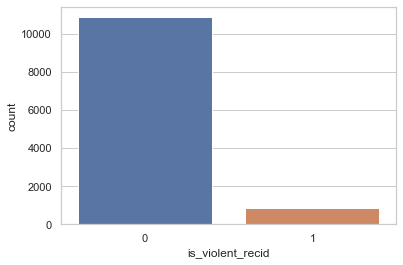

In [11]:
# Revisar distribución de is_violent_recid
sns.countplot(x = 'is_violent_recid', data = compas)
plt.show()

In [12]:
# Obtener cantidad exacta de reincidencias violentas
print("Casos de reincidencia violenta: ", compas[compas['is_violent_recid'] == 1]['is_violent_recid'].count())

Casos de reincidencia violenta:  882


In [13]:
# Comprobar que todos los casos de reincidencia violenta tienen fecha de registro
bar = compas[compas['is_violent_recid'] == 1]
print("Casos de reincidencia violenta con fecha nula: ", bar[bar['r_jail_in'].isnull()]['r_jail_in'].count())

Casos de reincidencia violenta con fecha nula:  0


# Revisión del Poder de Clasificación de COMPAS Ante la Reincidencia

Antes de avanzar en este punto debemos recordar que **COMPAS no es un sistema de clasificación sino de asesoría**. El propio manual de COMPAS especifica que las escalas y puntajes son una herramienta para ayudar al practicante legal a tomar decisiones con mayor velocidad y orden (Northpointe, 2012). Si aceptamos que el umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante (algo que el manual en sí no especifica pero que para intenciones prácticas del siguiente análisis es un buen punto de partida). debemos poder generar una tabla de contingencia, explicando qué caso se considera como _positivo_ (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

**Nota aclaratoria:** Para propósitos de este análisis interpretamos "...es de 7 en adelante..." como `x > 7` para casos que merezcan medidas preventivas y `x <= 7` como casos que no la merecen, un resultado que es más cercano al propio manual de COMPAS (Northpointe, 2012).

Para avanzar primero definamos dos funciones: una para extraer la matriz de confusión de una manera sencilla y que nos facilite la impresión de la misma (la libreria SciKit tiene una función pero no imprime bien en Mac OSX), y otra para determinar todo tipo de indicadores de clasificación binaria resultados de una matriz de confusión.

In [14]:
def matriz_confusion(pred, actual):
    """Construye una matriz de confusión.
    
    La función construye una matriz de confusión amigable y fácil de imprimir
    en pantalla con solo dos parámetros. Funciona con valores de enteros pero
    no tienen que ser necesariamente binarios (ejemplo: 0 y 1). 
    
    Args:
        pred: lista o columna de un dataframe con los valores de predicción.
        actual: lista o columna con valores actuales del juego de datos
    
    Returns:
        Retorna un elemento crosstab cuyos componentes individuales pueden
        indexarse para obtener precision, positividad, etc. 
        
    """
    
    y_actu = pd.Series(actual, name='Actual')
    y_pred = pd.Series(pred, name='Predicted')
    df_confusion = pd.crosstab(y_pred, y_actu)
    return(df_confusion)

def indicadores(matriz):
    """Cálculo de indicadores principales de clasificación binaria
    
    Método sencillo que calcula los principales indicadores de clasificación
    binaria a partir de una matriz de confusión que ha su vez ha sido calculada
    con matriz_confusión.
    
    Args:
        matriz: una matriz de confusión resultante de aplicar la función
        matriz_confusión a dos vectores de predicciones y resultados actuales.
        
    Returns:
        Impresión en pantalla de TP, FP, TN, FN, sensibilidad, especificidad, 
        precisión, exactitud y tasa de falsos negativos.
    
    """
    TP = matriz[1][1]
    FP = matriz[0][1]
    TN = matriz[0][0]
    FN = matriz[1][0]
    sensitivity = round(TP / (TP + FN), 3) * 100
    specificity = round(TN / (TN + FP), 3) * 100
    precision = round(TP / (TP + FP), 3) * 100
    exactitud = round((TP + TN) / (TP + FP + TN + FN), 3) * 100
    tasa_falsos_negativos = round(100 - specificity, 3)
       
    print("TP = ", TP)
    print("FP = ", FP)
    print("TN = ", TN)
    print("FN = ", FN)
    print("------------------------------")
    print("sensibilidad = ", sensitivity,"%")
    print("especificidad = ", specificity,"%")
    print("precision = ", precision,"%")
    print("exactitud = ", exactitud,"%")
    print("tasa falsos negativos = ", tasa_falsos_negativos, "%")
   

In [15]:
# Analizar poder de clasificación de reincidencia
pred = []
for index, rows in compas.iterrows():
    if rows['decile_score'] > 7:
        pred.append(1)
    else:
        pred.append(0)

# Obtener matriz de confusión
matriz_confusion(pred, compas['reincidencia'])


Actual,0,1
Predicted,,
0,6952,2597
1,1102,1106


In [16]:
# Obtener principales indicadores de clasificación binaria
indicadores(matriz_confusion(pred, compas['reincidencia']))

TP =  1106
FP =  1102
TN =  6952
FN =  2597
------------------------------
sensibilidad =  29.9 %
especificidad =  86.3 %
precision =  50.1 %
exactitud =  68.5 %
tasa falsos negativos =  13.7 %


In [17]:
# Test rápido para comprobar matriz de confusión
x_tp = compas.query('decile_score >  7 & reincidencia == 1')['is_recid'].count()
x_fp = compas.query('decile_score >  7 & reincidencia == 0')['is_recid'].count()
x_fn = compas.query('decile_score <= 7 & reincidencia == 1')['is_recid'].count()
x_tn = compas.query('decile_score <= 7 & reincidencia == 0')['is_recid'].count()
print("TP: ", x_tp, "| FP: ", x_fp, "| FN: ", x_fn, "| TN: ", x_tn)

TP:  1106 | FP:  1102 | FN:  2597 | TN:  6952


Al ver los resultados cabe preguntarnos que es más importante, ¿sensibilidad vs. especificidad? En una prueba médica quizás es más importante la sensibilidad (detectar correctamente los casos positivos) versus la especificidad (detectar realmente los casos negativos). Pero a diferencia de la medicina en este caso es mejor que ante la duda de que un acusado se evalue como reincidente (y empeoren las condiciones de fianza o se incluya prisión preventiva) se evalúe como no reincidente ya que bajo la ley todo individuo es inocente hasta ser comprobado culpable. En ese sentido la especificidad de COMPAS es alta versus la sensibilidad, y si bien el sistema predice como no reincidentes a 2,597 personas que si lo fueron, solo predice como reincidentes a 1,102 personas que no lo fueron, reduciendo el impacto psicológico de permanecer arrestado más de lo necesario. En términos propios de la ciencia de datos, el grado de errores de **tipo I (falsos positivos)** es menor que el grado de errores de **tipo II (falsos negativos)**.

Un punto a considerar es que ProPublica en su análisis publicado no uso los 11,757 casos completos, sino mucho menos, explicando que "...Removimos gente de nuestro juego de datos para los cuales existía menos de dos años de información de reincidencia. La población restante sumaba 7,214 - mayor que el modelo de regresión logística, porque no necesitamos la información sobre el caso del acusado en esta instancia del análisis..." (Larson, J., Mattu, S., Kirchner, L. y Angwin, J., 2016). En nuestro caso particular estamos usando el total del juego de datos y no tenemos forma segura de reconfirmar como extrapolar esta variablea 7,214 casos. En el cuaderno Jupyter de ProPublica, que se ubica en Github, el código R hace una llamada a la variable `i.lifetime` de un juego `cox-parsed.csv` para la regresión Cox. En dicho análisis, tomando la población general, el indicador de sensibilidad es de 63% (superior a nuestros resultados) y el indicador de especificidad es de 68% (inferior a nuestros resultados). Parece un clasificador más balanceado que el que nosotros obtenemos con todos los casos ajustadando nuestro `feature` de reincidencia, pero el uso de la regresión Cox varía ligeramente la interpretación de la matriz de confusión (Larson, J. y Roswell, M., 2017)

# Análisis Visual de Posibles Sesgos en la Clasificación de Reincidencia
La base de la controversia del informe de ProPública esta basada en sus hallazgos (o mejor dicho supuestos puntos de diferencia, ya que Northpointe rechazó los mismos) de los siguientes puntos (Larson, J., Mattu, S., Kirchner, L. y Angwin, J., 2016):

* Las predicciones de reincidencia para acusados afroamericanos son más altas que la misma tasa de reincidencia. 
* Las puntuaciones para acusados blancos suelen ser menos riesgosas que lo que en realidad ameritan ser.
* Esta condición prevalece aun cuando se ajusta y controla para otras variables que intervienen. 

No hay mención en el preambulo inicial del estudio de diferencias notables entre hombres y mujeres, pero si hay menciones en el cuaderno de análisis sobre el caso. 

Antes de poder analizar si hay sesgo o no, revisemos visualmente las distribuciones de las poblaciones por raza y por género. 

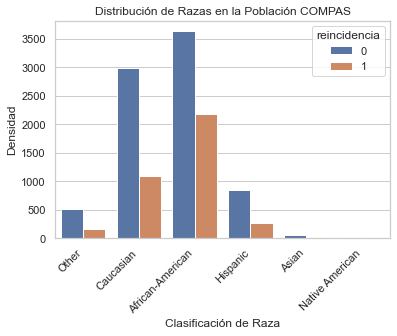

In [18]:
chart = sns.countplot(data = compas, x = 'race', hue = "reincidencia")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Clasificación de Raza")
plt.ylabel("Densidad")
plt.title("Distribución de Razas en la Población COMPAS")
plt.show()

Aparentemente hay una proporción mayor de acusados de raza afroamericana tanto en cantidad absoluta como reincidencia. El informe de ProPublica arranca con gráficas sobre la diferencia de distribución de puntajes de evaluación entre acusados blancos y afroamericanos. Veamos una distribución total entre razas y tratemos de replicar dichas gráficas.  

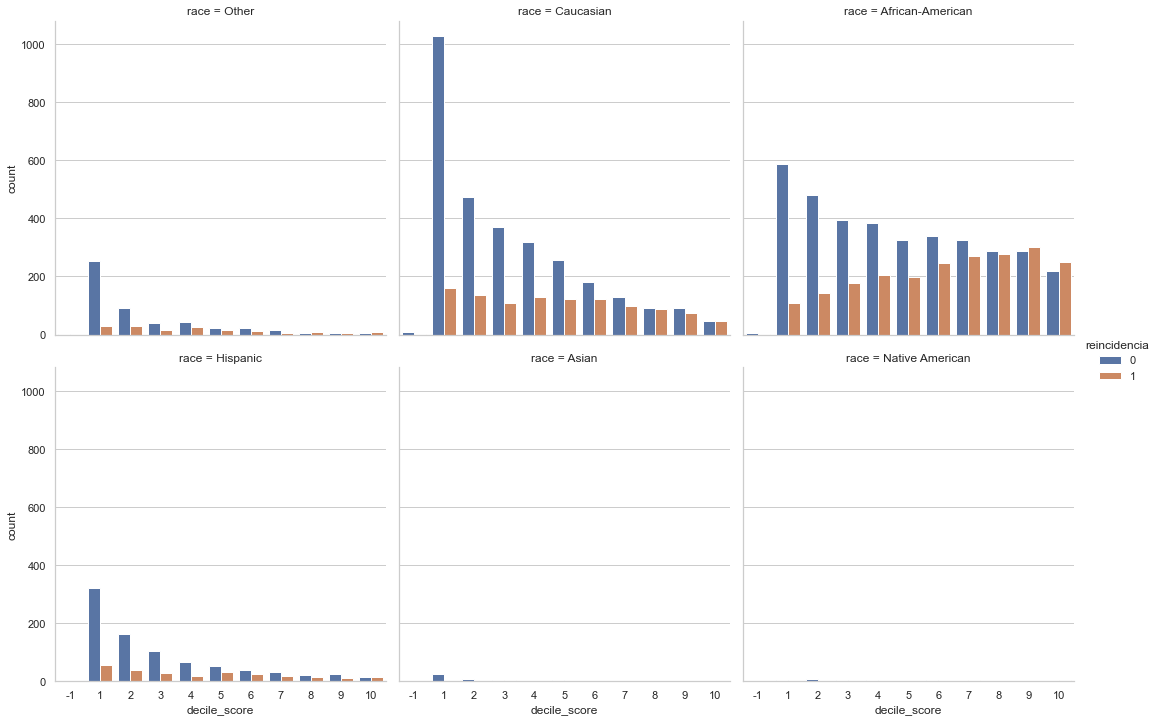

In [19]:
chart = sns.catplot(data = compas, x = 'decile_score', hue = "reincidencia", col = "race", kind="count", col_wrap = 3)
plt.show()

El análisis visual nos indica que si bien las puntuaciones para acusados blancos son más benignas que para los acusados afroamericanos, a medida que avanza la escala de puntuación, los acusados afroamericanos tienden a elevar el grado de reincidencia, mientras que la distribución de casos con reincidencia es homogenea para los acusados blancos. 

Comprobemos si lo mismo se presenta en el caso de género.

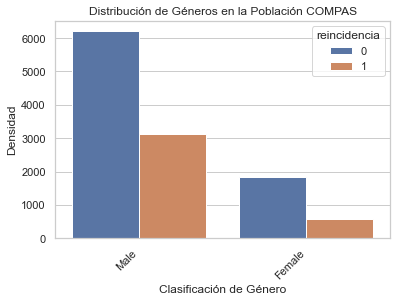

In [20]:
chart = sns.countplot(data = compas, x = 'sex', hue = "reincidencia")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Clasificación de Género")
plt.ylabel("Densidad")
plt.title("Distribución de Géneros en la Población COMPAS")
plt.show()

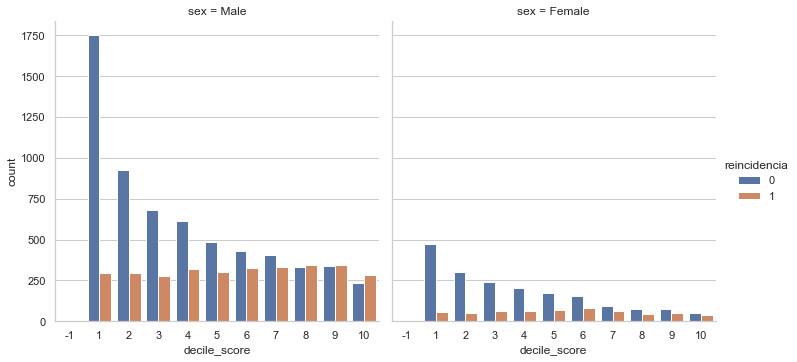

In [21]:
chart = sns.catplot(data = compas, x = 'decile_score', hue = "reincidencia", col = "sex", kind="count", col_wrap = 2)
plt.show()

Cuando lo vemos desglosado por género, las distribuciones de reincidencias son homogeneas para tanto hombres como mujeres. Pero es difícil juzgar que los hombres tienen necesariamente un peor trato que las mujeres solo viendo las distribuciones de esta manera. Veamos primero la distribución de valores del puntaje hombres versus mujeres.

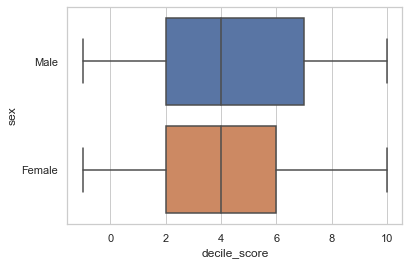

In [22]:
sns.boxplot(x="decile_score", y="sex", data = compas)

La primera gráfica de bigotes vemos que la distribución de puntajes es más alta para hombres que mujeres, lo que daría algo de cierto a que el sistema otorga puntajes más severos a los hombres que las mujeres. Veamos el patrón pero desglosado un nivel más en casos reincidentes y no reincidentes. 

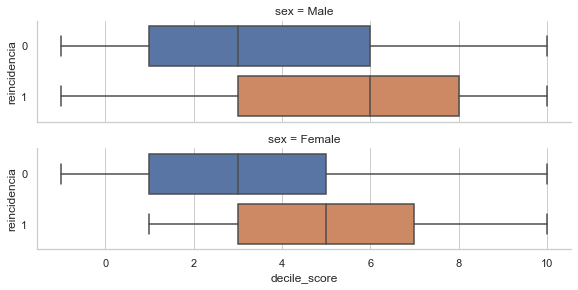

In [23]:
sns.catplot(x="decile_score", y="reincidencia", row="sex", kind="box", orient="h", data=compas, height=2, aspect=4)
plt.show()

Curiosamente, tanto en hombres como mujeres, el sistema COMPAS otorga puntajes más altos a los reincidentes. Pero por la cobertura de las regiones intercuantiles, es notable que los hombres reciben puntajes más severos que las mujeres en ambos casos. 

Ahora bien, ¿podemos decir solamente con la información visual si los puntajes son justos o no? Volvamos al punto inicial de reincidencia por raza. Vemos en las gráficas que los puntajes son menos riesgosas para acusados caucásicos que afroamericanos, pero a la vez comprobamos que las tasas de reincidencia son mayores en este último grupo. Vemos también que las evaluaciones a hombres son más riesgosas que mujeres, pero que en ambos casos las evaluaciones más severas se concentran en acusados de ambos sexo que reinciden, y que solo viendo las gráficas de distribución de puntajes, los hombres tienen más reincidencia absoluta que las mujeres pero no es claro si la proporción hace justa o no la puntuación. 

Si la finalidad de las visualizaciones en la ciencia de datos es la de sumarizar grandes cantidades de información para la toma de decisión, las gráficas generadas no están ayudando a justificar el mérito o no de las puntuaciones. Solo hay dos observaciones que destacan:

* La distribución de puntajes para acusados blancos es menos riesgosa pero a la vez en ningun punto de la escala hay más casos de reincidencia que no-reincidencia. En el caso de acusados afroamericanos, hacia el extremo de riesgo de la escala (en los puntos 9 y 10) hay más casos de reincidencia que no reincidencia, lo que pudiera apuntar a que el modelo de COMPAS es más benigno en ese sentido identificando con puntaje más bajo casos que son de alta reincidencia. 
* La diferencia entre puntuaciones intercuantiles entre sexos y casos de reincidencia y no-reincidencia son similares entre hombres y mujeres, con alrededor de un punto como diferencia absoluta. Acusados con mayor potencial de reincidencia comienzan con regiones intercuantiles similares, y los hombres tienen un techo de 8 cuando el de las mujeres está más cercano a 7. Pero los hombres reinciden más, por lo que quizás el modelo (que es un modelo caja negra) tiene merito. 


# Efectividad del Sistema COMPAS en Delitos Generales vs. Violentos
¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva? El sistema arroja dos puntajes: uno para el riesgo de reincidencia común que ya analizamos y otro para riesgo de delitos violentos. La reincidencia por delitos violentos es mucho menor que la reincidencia por delitos menores, pero no sabemos sobre la capacidad de clasificar correctamente reincidencia por crímenes violentos.

In [24]:
# Analizar poder de clasificación de reincidencia violenta
pred = []
for index, rows in compas.iterrows():
    if rows['v_decile_score'] > 7:
        pred.append(1)
    else:
        pred.append(0)

# Obtener matriz de confusión
matriz_confusion(pred, compas['is_violent_recid'])

Actual,0,1
Predicted,,
0,9944,697
1,931,185


In [25]:
indicadores(matriz_confusion(pred, compas['is_violent_recid']))

TP =  185
FP =  931
TN =  9944
FN =  697
------------------------------
sensibilidad =  21.0 %
especificidad =  91.4 %
precision =  16.6 %
exactitud =  86.2 %
tasa falsos negativos =  8.6 %


De 882 casos posibles de reincidencia violenta, COMPAS identificó correctamente 185, un 21% de sensibilidad, menor que en el caso de reincidencia común. Sin embargo, la especificidad es mucho mayor, con 91.4%. El sistema arroja muchos más falsos positivos que falsos negativos, una relación inversa con el modelo de reincidencia por delitos comunes. Nuestro puntaje de sensibilidad del 21.0% es muy cercano al 20% que concluye ProPublica en su reporte de cómo se obtuvieron los resultados (Larson, J. y Roswell, M., 2017).

En conclusión:

* Utilizando los puntajes y umbrales sugeridos por COMPAS, se identificaron correctamente 185 casos de reincidencia violenta, que es un indicador bajo (sensibilidad 21.4%)
* Bajo los mismos se clasificaron 697 casos como no reincidentes cuando en realidad fueron reincidentes violentos, lo que afectó el crimen en general. 
* Se identificaron erroneamente 931 casos como falsos positivos, reincidentes violentos que nunca lo fueron. 

Podemos concluir que el modelo COMPAS hace una tarea de predicción con mucho menor desempeño cuando se trata de casos de reincidencia por crimenes violentos. 

# Material de Referencia

Angwin, J. y Larson, J. (2016) Machine Bias. USA. _ProPublica_. Recuperado de https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

Barenstein, M. (2019) _ProPublica’s COMPAS Data Revisited_. arXiv:1906.04711v3 [econ.GN] 8 de Julio del 2019

Angwin, J., Larson, J., Kirchner, L., &amp; ;attu, S. (2016, May 23). How We Analyzed the COMPAS Recidivism Algorithm. Retrieved October 17, 2020, from https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

COMPAS (software). (2020, September 29). Retrieved October 17, 2020, from https://en.wikipedia.org/wiki/COMPAS_(software)

Northpointe (2012) Practitioners Guide to COMPAS. Recuperado Octubre 17 del 2020 de http://www.northpointeinc.com/downloads/compas/Practitioners-Guide-COMPAS-Core-_031915.pdf

Python List Comprehension (Syntax &amp; Examples) - Nested List Comprehension Python. (2018, October 21). Retrieved October 17, 2020, from https://data-flair.training/blogs/python-list-comprehension/



> Ariel E. Meilij - Octubre 2020